### Question 1: Identify the glass type (70)

Following is a data about the glass. Each observation represents one glass with its type and corresponding oxide content. There are 6 types of glass in the data.

In [76]:
import pandas as pd

glass = pd.read_csv('glass.csv')
glass.head()

X = glass.drop(columns = ['ID', 'type'])
y = glass['type']

print(X)

          Rl     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]


1. Split the training and test data. Fit a decision tree and plot it. (10) 

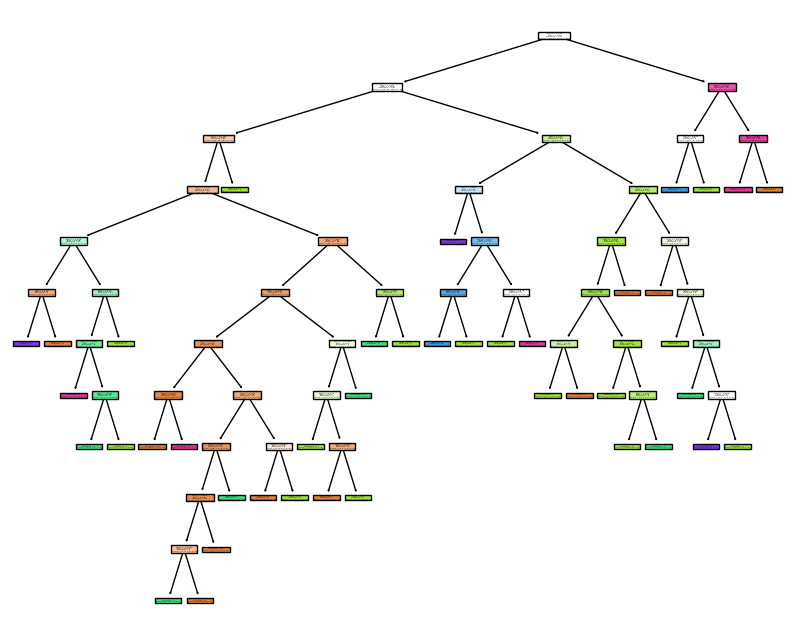

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state = 4400)

# Fit the decision tree model
decision_tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, filled=True)
plt.show()

2. Pruning the tree with parameter ccp_alpha. Plot the best tree. Print the best parameter and accuracy. Note: remember to split the training data into training and validation. You can choose the alpha from 0.01 to 10, and ignore the warning message. (20)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Decision Tree Accuracy: 0.6744186046511628
Best Parameters: {'ccp_alpha': 0.01}


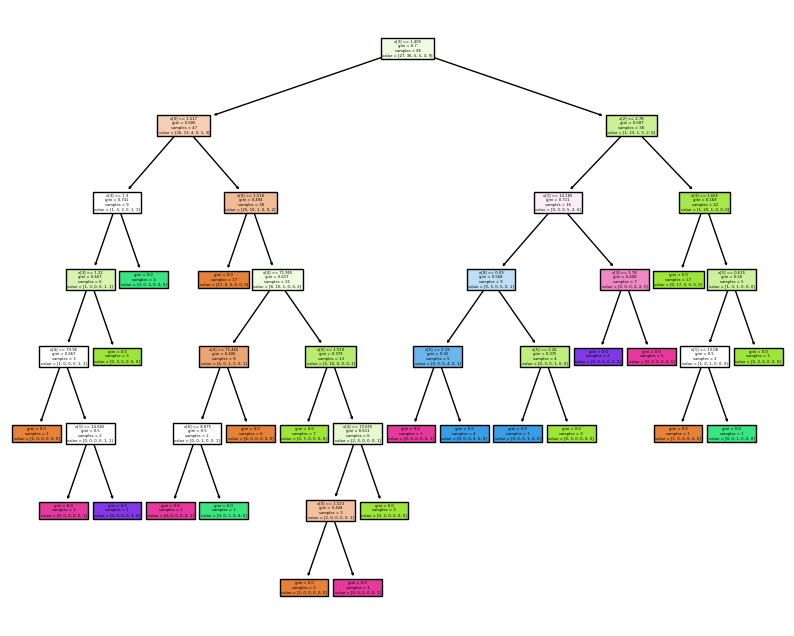

In [78]:
# Split the dataset into training and validating sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                    test_size=0.5,
                                                    random_state=4400)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state = 4400)

# Define the parameter grid for grid search
param_grid = {
    'ccp_alpha': [0.01, 0.1, 1, 5, 10]
}

# Perform grid search to find the best combination of parameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_valid, y_valid)

# Get the best estimator and its parameters
best_params = grid_search.best_params_

# Make predictions using the best parameters
best_tree = DecisionTreeClassifier(**best_params, random_state = 4400)
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)

# Calculate accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Best Decision Tree Accuracy:", accuracy)
print("Best Parameters:", best_params)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(best_tree, filled=True)
plt.show()

3. Fit an Adaboost model. Set the n_estimator equal to 100. Print the accuracy. (10) 

In [79]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Create and fit an AdaBoost classifier with decision tree as the base estimator
adaboost = AdaBoostClassifier(n_estimators=100, random_state=4400)
adaboost.fit(X_train, y_train)

# Make predictions using the AdaBoost classifier
adaboost_predictions = adaboost.predict(X_test)

# Calculate accuracy of the AdaBoost classifier
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Accuracy:", adaboost_accuracy)

AdaBoost Accuracy: 0.5348837209302325


4. Fit a random forest model. Tune the parameters 'n_estimators', 'max_depth', 'min_samples_leaf' and 'max_features', Print the accuracy and show the variable important plot. (20)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


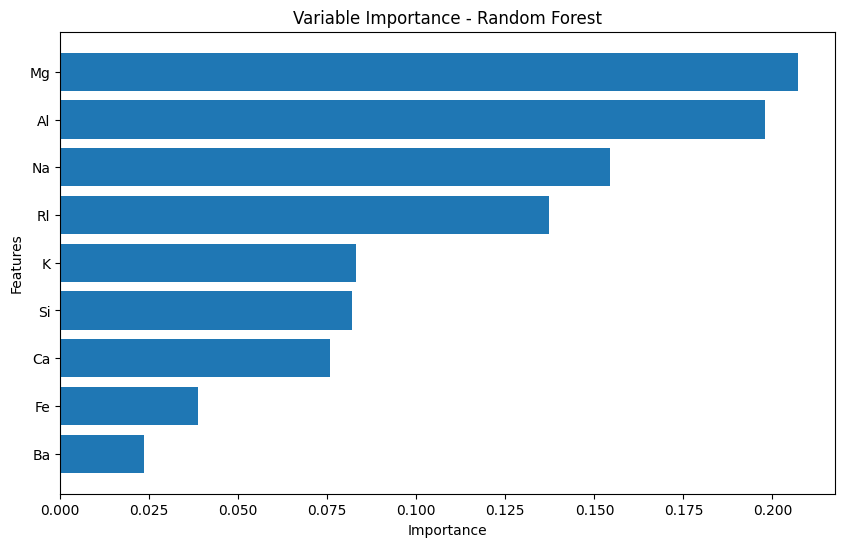

Forest Accuracy: 0.7209302325581395
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 50}


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                    test_size=0.5,
                                                    random_state=4400)

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=4400)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search to find the best combination of parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_valid, y_valid)

# Get the best estimator and its parameters
best_params = grid_search.best_params_

# Make predictions using the best Random Forest classifier
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# Plot the variable importance for Random Forest
importances = best_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Variable Importance - Random Forest")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [list(X.columns)[i] for i in indices])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Calculate accuracy of the best Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Forest Accuracy:", accuracy)
print("Best Parameters:", best_params)

5. Fit another decision tree with the most three important features. Plot the decision tree and print the accuracy. (10)

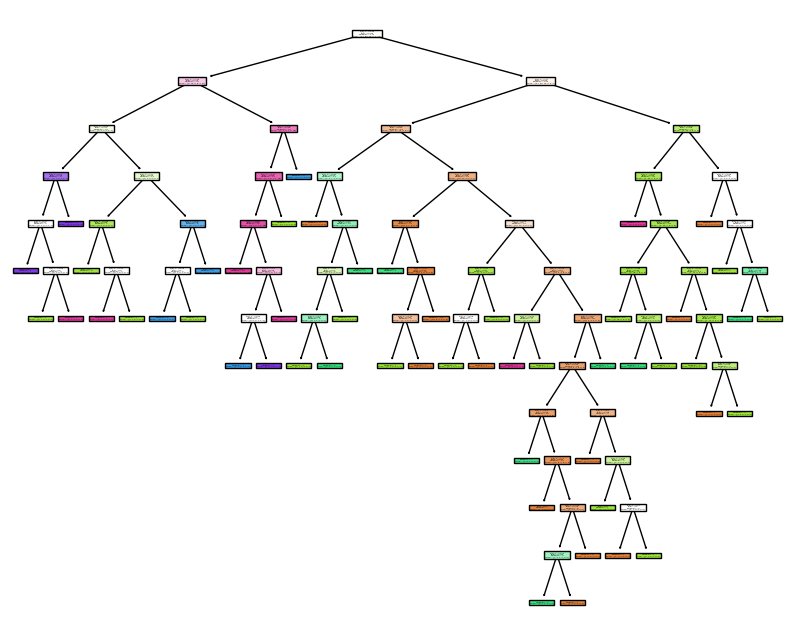

Accuracy:  0.6744186046511628


In [81]:
X = glass[['Mg', 'Rl', 'Al']]
y = glass['type']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state = 4400)

# Fit the decision tree model
decision_tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, filled=True)
plt.show()

predictions = decision_tree.predict(X_test)

# Calculate accuracy of the Random Forest classifier
accuracy = accuracy_score(y_test, predictions)

print('Accuracy: ', accuracy)

### Question 2: Models comparison (30)

1. List a couple of characteristics that may lead you to consider using random forest. (Data size, features, etc. )

Random forests are a good choice if the data has many variables that are highly correlated with each other, and you are able to generate a large enough number of trees. Random forests are a type of bagging, which is an ensemble learning method. Essentially, decision trees are made on bootstrap replicas, and then for classification tasks, the most popular prediction among all the trees becomes the overall prediction, and for regression tasks, the output of all trees is averaged.

2. Compare the differences between Logistics regression and Random forest. 

Logistic regression is used for binary classification and generates a linear decision boundary, while random forest creates several decision trees using bootstrapping and outputs the majority prediction (classification) or average prediction (regression) of the individual trees. Random forests are also an ensemble model, meaning they use predictions from multiple trees to make a final prediction, while logistic regression only uses one model. Random forests can also describe non-linear relationships, while logistic regression is used for linear relationships.

3. Explain why Random Forest is called "random forest"?

Because random forests utilize bootstrap sampling. Bootstrap sampling is when, given a set Z containing N samples, Z' is created by drawing N examples randomly with replacement from Z. Additionally, random forests use the random vector method, where at each node the best split is selected from a random sample of attributes instead of all attributes. Due to these two reasons, random forests are referred to as "random forests".